# Single node modeling example

In [2]:
using PyPlot, WaveFD, JetPackWaveFD

In [3]:
v = read!("../02_marmousi_model_setup/marmousi_vp_20m_176x851.bin", Array{Float32}(undef, 176,851));
dz,dx = 20.0,20.0
nz,nx = size(v)
@show dz,dx
@show nz,nx;

(dz, dx) = (20.0, 20.0)
(nz, nx) = (176, 851)


In [4]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    nthreads = Sys.CPU_THREADS,
    isinterior = true,
    ntrec = 1101,
    dtrec = 0.002,
    dtmod = 0.001,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)))

"Jet nonlinear operator, (176, 851) → (1101, 1701)"

In [5]:
d = F*v;

┌ Info: nonlinear forward on cbox-wask-D16s-v3, srcfieldfile=/scratch/field-2f0538df-ec2f-4aef-9065-ddb985abc7f3.bin
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:387
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step   500 of  2201 ;   78.23 MCells/s (IO=46.06%, EX=27.27%) -- rms d,p; 1.8520e+00 1.2134e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  2201 ;   81.86 MCells/s (IO=40.66%, EX=26.00%) -- rms d,p; 2.0924e+00 1.1155e+00
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:703
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD,

1101×1701 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

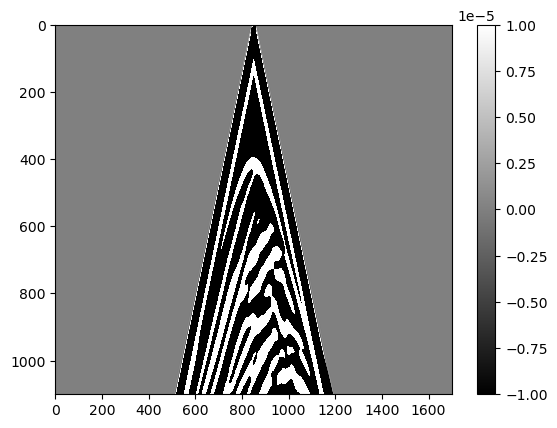

In [6]:
imshow(d,aspect="auto",cmap="gray");clim(-1e-5,1e-5);colorbar();